In this notebook we will be building a machine learning model using population data to predict heart disease risk.

To do:

* Use Pandas to import the csv data
* One-hot encoding to convert categorical variables into binary form
* Undersample the model to make heart disease vs no heart disease equal
* Random forest model, logistic regression, XGBoost Classsifier to comapare models
* Confusion matrix to determine best model
* save the model

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("../resources/heart_2020_cleaned.csv", encoding = 'utf-8')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# First list all the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# List all the unique values for each column
for col in list(df):
    print(col)
    print(df[col].unique())

HeartDisease
['No' 'Yes']
BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking
['Yes' 'No']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
['Yes' 'No']
GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma
['Yes' 'No']
KidneyDisease
['No' 'Yes']
Skin

## Use One Hot Encoding and LabelEncoder to encode the categorical variables

In [5]:
# Use LabelEncoder to encode the yes/no columns to 1/0
yesno_columns = ["HeartDisease","Smoking", "AlcoholDrinking", "Stroke", 
               "DiffWalking", "PhysicalActivity", "Asthma",
               "KidneyDisease","SkinCancer"]

label_encoder=LabelEncoder()

df[yesno_columns]=df[yesno_columns].apply(label_encoder.fit_transform)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [6]:
# Reformat the data into data and target
data = df.drop("HeartDisease", axis = 1)
target = df.HeartDisease

In [7]:
# Put categorical X column names into list
categorical_data = ["Sex", 
               "AgeCategory","Race","Diabetic","GenHealth"]

# Using the list above, create a new df with the encoded columns
encoded_data = pd.get_dummies(data, columns = categorical_data)

# Since the Sex category is binary, we can drop one of the columns to reduce colinearity later on
encoded_data.drop(columns="Sex_Male", inplace = True)

encoded_data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3.0,30.0,0,1,5.0,1,...,1,0,0,1,0,0,0,0,0,1
1,20.34,0,0,1,0.0,0.0,0,1,7.0,0,...,1,1,0,0,0,0,0,0,0,1
2,26.58,1,0,0,20.0,30.0,0,1,8.0,1,...,1,0,0,1,0,0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,6.0,0,...,1,1,0,0,0,0,0,1,0,0
4,23.71,0,0,0,28.0,0.0,1,1,8.0,0,...,1,1,0,0,0,0,0,0,0,1


In [8]:
# Define X and y
X = encoded_data
y = target.values.reshape(-1,1)

print(X.shape)
print(y.shape)

(319795, 41)
(319795, 1)


## Use correlation matrix to visualise how each parameter correlates with one another

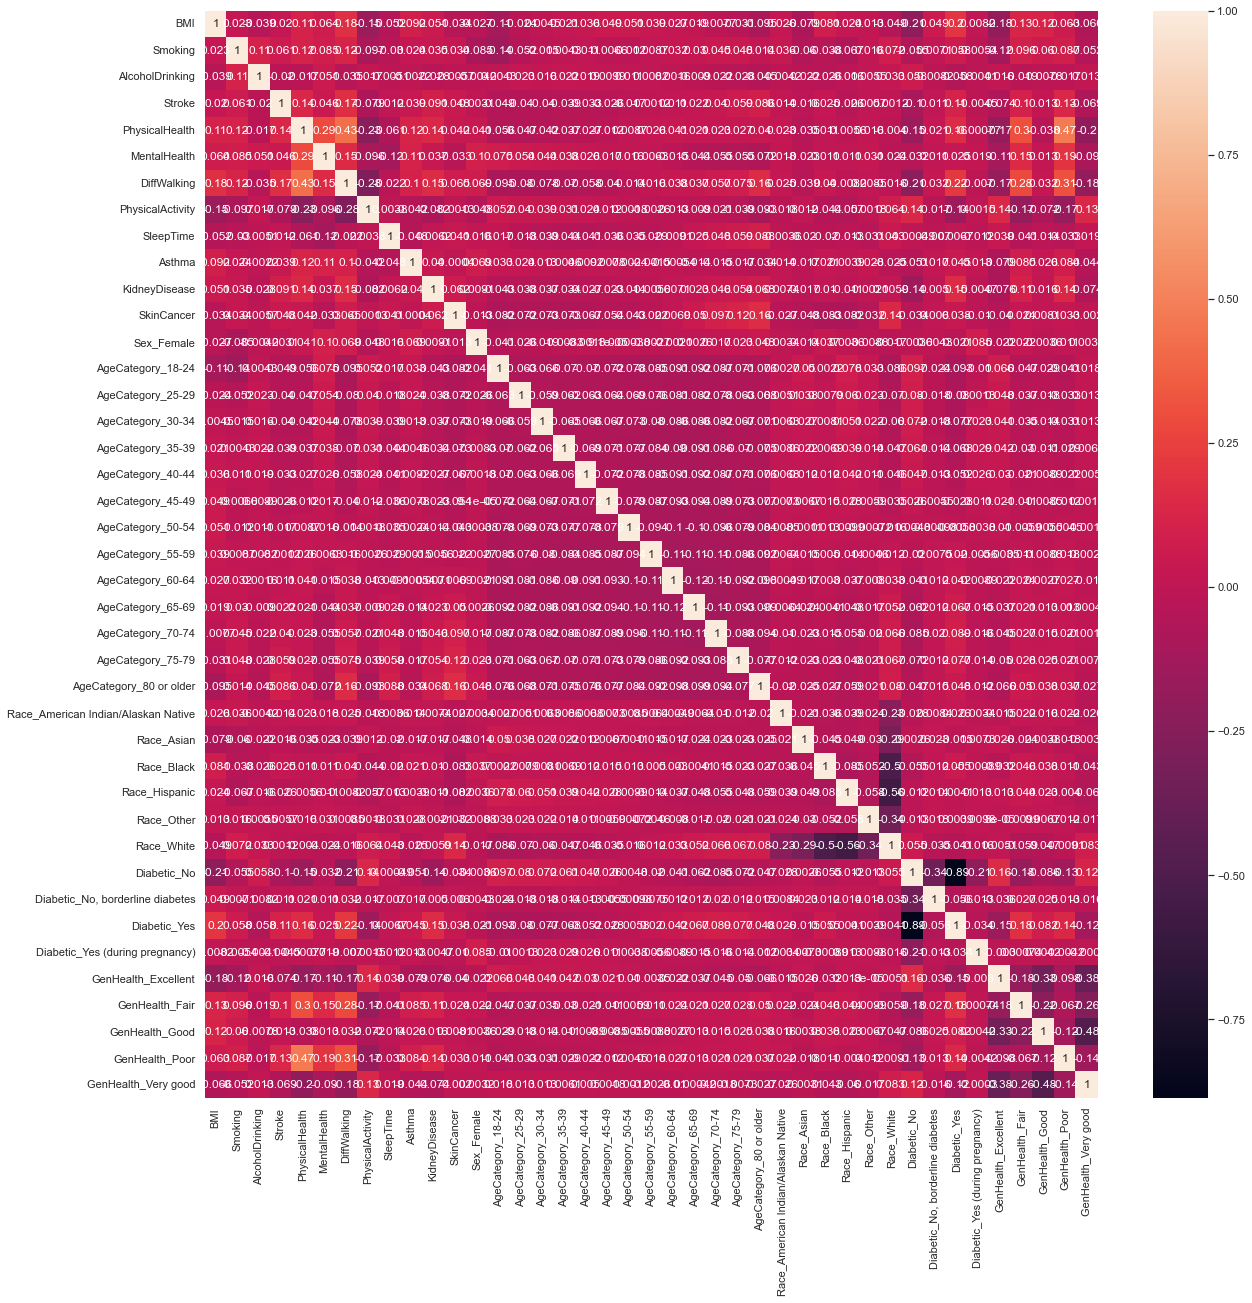

In [38]:
# Create Correlation matrix
corrMatrix = X.corr()

# Visualise the correlation matrix
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

As you can see from the correlation matrix, each parameter is not really correlated with the other, with the exception of the columns that were converted into dummy data (i.e., Age Category, Race, General Health), where each option is negatively correlated with the other options.

## Use Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)
# stratify=y tells train_test_split to make sure that the training and test datasets 
# contain examples of each class in the same proportions as in the original dataset. 

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (239846, 41)
X test shape: (79949, 41)
y train shape: (239846, 1)
y test shape: (79949, 1)


## Scale the data using StandardScaler

In [11]:
X_scaler = StandardScaler().fit(X_train)

In [12]:
# Transform the training and testing data to the scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Use Random Undersampling to balance the data between heart disease sample and non heart disease sample

We do this because ~90% of the total data is classified as "No Heart Disease" and only ~10% is classified as "Yes Heart Disease". Since the original dataset is imbalanced, it is good practice to undersample the larger dataset to match the number of cases in the smaller dataset

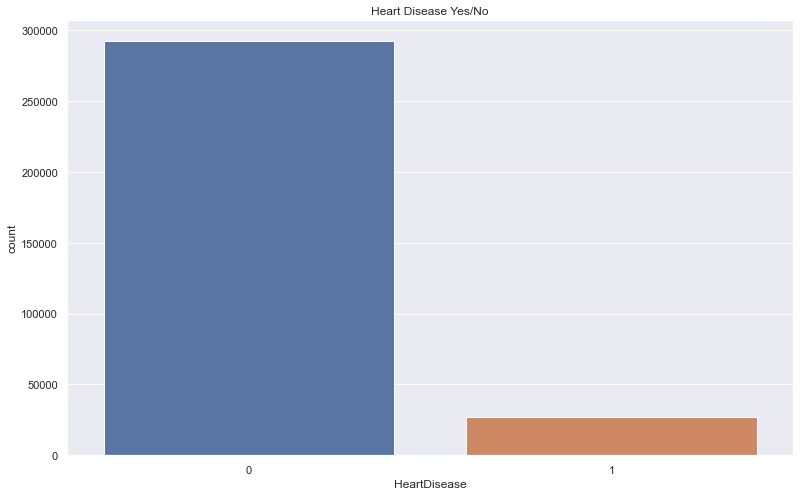

In [13]:
# Plot the distribution of heart disease using sns countplot
sns.set(rc = {'figure.figsize':(13,8)})
sns.countplot(x="HeartDisease", data = df).set(title="Heart Disease Yes/No")
plt.show()

In [14]:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

print(dict(pd.Series(y_train).value_counts()))

## We don't resample the testing data as this would be introducing bias

{1: 20530, 0: 20530}


## Create Random Forest model using the target variable as "HeartDisease"

In [15]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)

rf = rf.fit(X_train, y_train)

In [16]:
# Create predictions
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

for x in range(0,10,1):
    print(f'Prediction: {rf_predictions[x]}, Actual: {y_test[x]}')
    
print(rf_accuracy)

Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 1, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 1, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 1, Actual: [0]
Prediction: 1, Actual: [1]
0.7101527223605049


In [17]:
# Score the training and testing data
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.997515830491963
Testing Data Score: 0.7101527223605049


<AxesSubplot:>

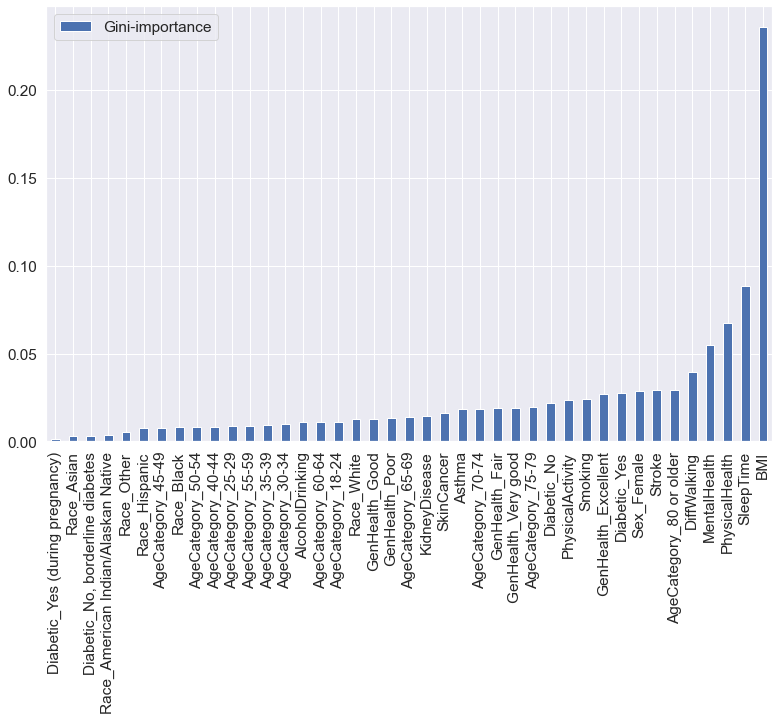

In [36]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)

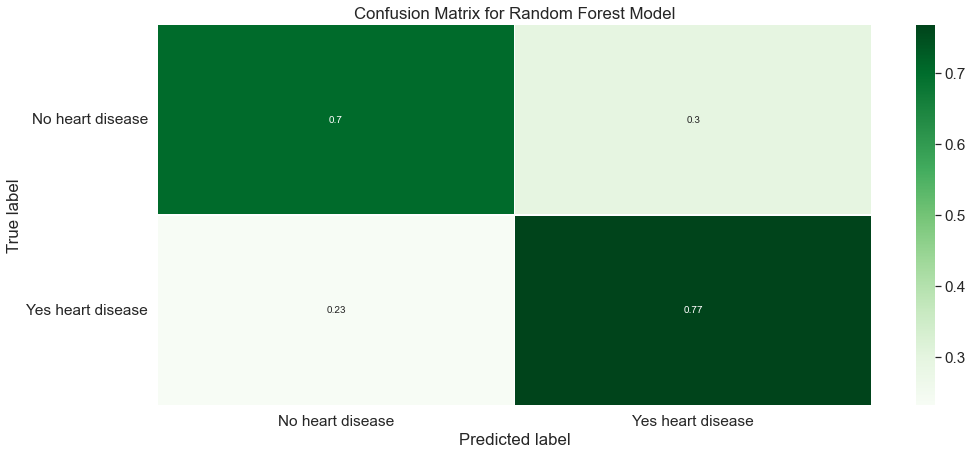

In [19]:
# confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rf_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['No heart disease', "Yes heart disease"]
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## XGBOOST Model

In [20]:
# Using the X and y variables above, let's fit them to a XGB classifier model'
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

print(xgb_model)

C:\Users\sarah\anaconda3\envs\PythonAdv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [21]:
xgb_predictions = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)

for x in range(0,10,1):
    print(f'Prediction: {xgb_predictions[x]}, Actual: {y_test[x]}')
    
print(xgb_accuracy)

Prediction: 0, Actual: [0]
Prediction: 1, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 1, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 1, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 1, Actual: [0]
Prediction: 1, Actual: [1]
0.7290147469011495


In [23]:
# Score the training and testing data
print(f"Training Data Score: {xgb_model.score(X_train, y_train)}")
print(f"Testing Data Score: {xgb_model.score(X_test, y_test)}")

Training Data Score: 0.8073550901120312
Testing Data Score: 0.7290147469011495


In [30]:
sorted(zip(xgb_model.feature_importances_, X.columns), reverse=True)

[(0.101927765, 'GenHealth_Excellent'),
 (0.077510394, 'AgeCategory_80 or older'),
 (0.07707454, 'DiffWalking'),
 (0.07407586, 'Diabetic_Yes'),
 (0.05857232, 'AgeCategory_30-34'),
 (0.056091186, 'AgeCategory_18-24'),
 (0.053976838, 'AgeCategory_75-79'),
 (0.053743485, 'AgeCategory_25-29'),
 (0.052095935, 'GenHealth_Very good'),
 (0.043832637, 'AgeCategory_35-39'),
 (0.04185129, 'Stroke'),
 (0.041147474, 'KidneyDisease'),
 (0.029315313, 'AgeCategory_45-49'),
 (0.02889525, 'AgeCategory_70-74'),
 (0.026568362, 'AgeCategory_40-44'),
 (0.021918932, 'Sex_Female'),
 (0.018297426, 'GenHealth_Poor'),
 (0.01284542, 'GenHealth_Good'),
 (0.012840855, 'Smoking'),
 (0.010559117, 'AgeCategory_50-54'),
 (0.010345555, 'AgeCategory_65-69'),
 (0.0072233295, 'GenHealth_Fair'),
 (0.0072171534, 'Race_White'),
 (0.006279095, 'PhysicalHealth'),
 (0.0057776007, 'AlcoholDrinking'),
 (0.0057593775, 'Race_Asian'),
 (0.005417751, 'AgeCategory_60-64'),
 (0.005237967, 'SkinCancer'),
 (0.005212409, 'Asthma'),
 (0.0049

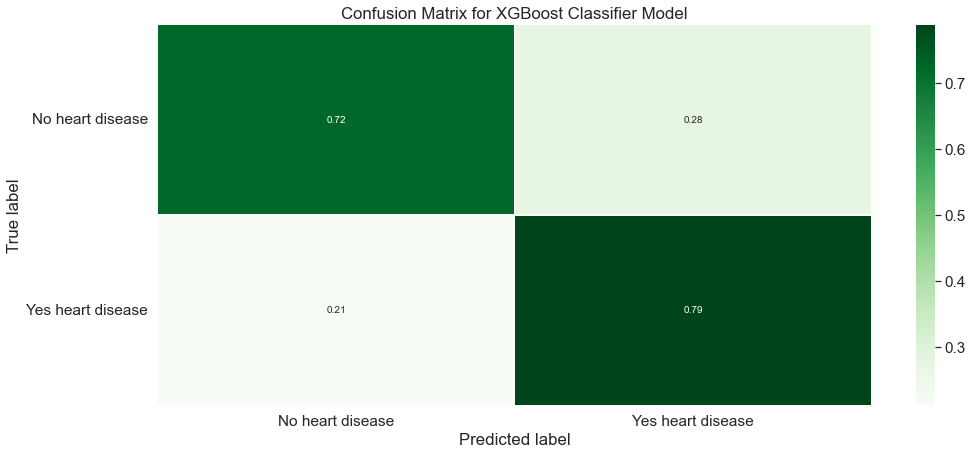

In [22]:
# confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, xgb_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['No heart disease', "Yes heart disease"]
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Classifier Model')
plt.show()

## Logistic Regression

In [25]:
lg_model = LogisticRegression(solver = "lbfgs", max_iter = 1000)

lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
lg_predictions = lg_model.predict(X_test)

lg_accuracy = accuracy_score(y_test, lg_predictions)

for x in range(0,10,1):
    print(f'Prediction: {lg_predictions[x]}, Actual: {y_test[x]}')
    
print(lg_accuracy)

Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 1, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 0, Actual: [0]
Prediction: 1, Actual: [1]
0.7503658582346245


In [27]:
# Print the r2 score for the test data
print(f"Training Data Score: {lg_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lg_model.score(X_test, y_test)}")

Training Data Score: 0.7628835849975646
Testing Data Score: 0.7503658582346245


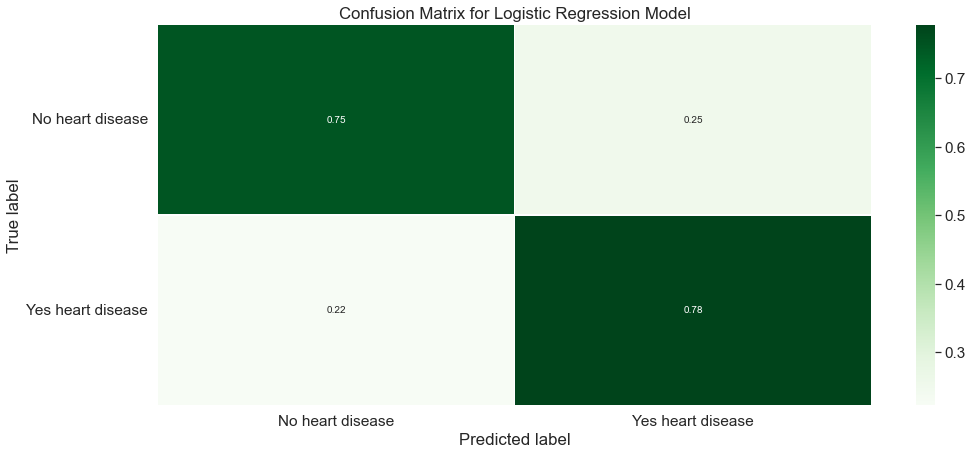

In [31]:
# confusion matrix
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, lg_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['No heart disease', "Yes heart disease"]
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

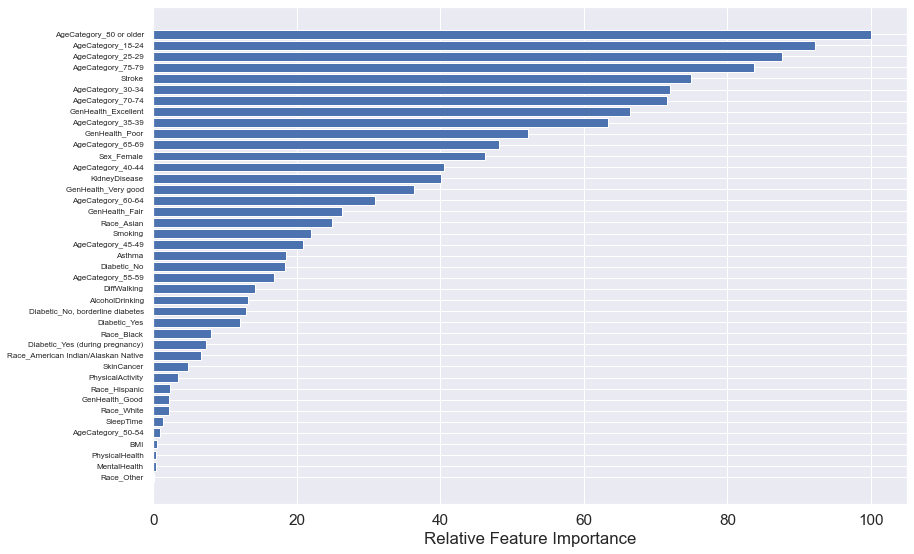

In [33]:
feature_importance = abs(lg_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [ ]:
# Try neural network MNIST dataset

# Try reducing features even more e.g. Age category translate to only 3 categories

# Use select K best to select the most important features BEFORE modelling